# 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.stattools import adfuller 

In [3]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
import os

In [5]:
pwd

'C:\\Users\\Balaji.N\\Favorites\\data science'

In [6]:
df = pd.read_csv('D://Downloads/AirPassengers.csv')# extering the data 

In [7]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
pd.to_datetime(df['Month']) 

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [9]:
df.set_index(pd.to_datetime(df['Month']), inplace=True) #formeting the yyyy-mm to yyyy-mm-dd 

In [10]:
df.drop('Month', axis=1, inplace=True)

In [11]:
df.rename(columns={'#Passengers':'pass'}, inplace=True)

In [12]:
df

,pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [13]:
adfuller(df)[1]

0.991880243437641

In [14]:
df.shift(-1) # when we shift values is fixed number it will become nan values for  mention coloum number  ex:shift(1)
                   # in shift (-1 ) it will be show last value is nan

,pass
Month,
1949-01-01,118.0
1949-02-01,132.0
1949-03-01,129.0
1949-04-01,121.0
1949-05-01,135.0
...,...
1960-08-01,508.0
1960-09-01,461.0
1960-10-01,390.0


In [16]:
D1=df-df.shift(-1) # first order of different 
D1

,pass
Month,
1949-01-01,-6.0
1949-02-01,-14.0
1949-03-01,3.0
1949-04-01,8.0
1949-05-01,-14.0
...,...
1960-08-01,98.0
1960-09-01,47.0
1960-10-01,71.0


In [17]:
D1.dropna(inplace=True)

In [19]:
d1 = D1.rolling(window=3).mean()
d1

,pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,-5.666667
1949-04-01,-1.000000
1949-05-01,-1.000000
...,...
1960-07-01,-44.666667
1960-08-01,9.000000
1960-09-01,53.666667


In [20]:
adfuller(D1)

(-2.8292668241699923,
 0.054213290283826474,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [21]:
D1.dropna(inplace=True)

In [22]:
adfuller(D1)[1]

0.054213290283826474

<Axes: xlabel='Month'>

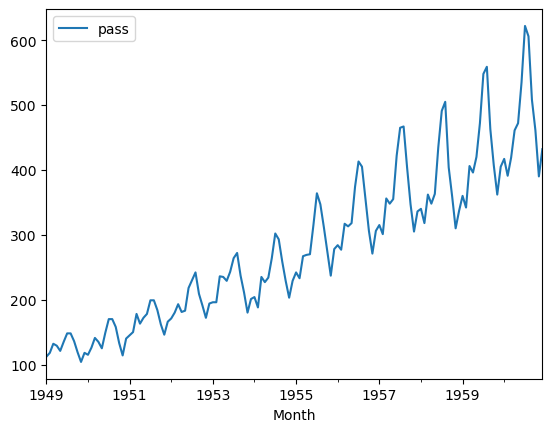

In [23]:
df.plot.line() 

<Axes: xlabel='Month'>

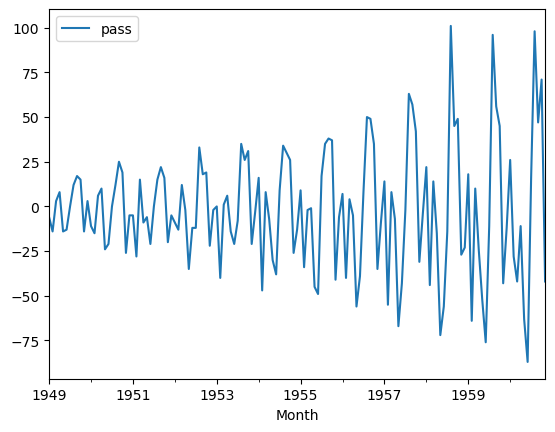

In [24]:
D1.plot.line()

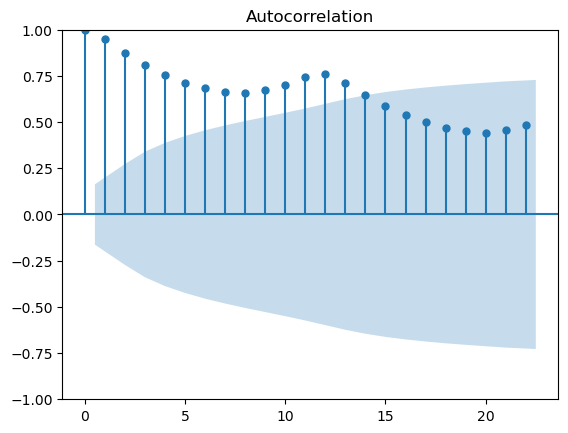

In [25]:
plot_acf(df) # this show the out layer for the data 
plt.show()

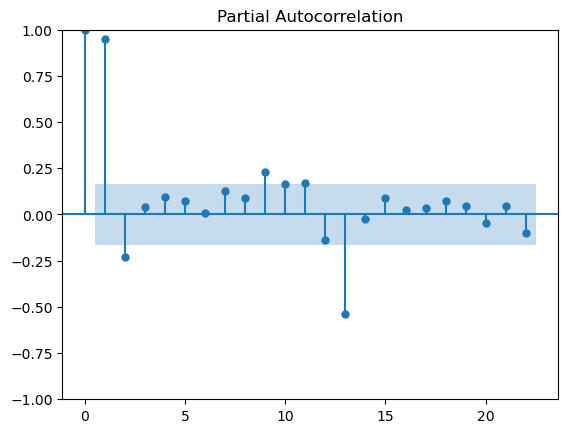

In [26]:
plot_pacf(df)
plt.show()

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from statsmodels.tsa.arima.model import ARIMA # import the ARIMA  this model will The Autoregressive (AR), Integrated (I), and Moving Average (MA) 
#remove the outlayer and it also predefind modle 

In [31]:
mdl = ARIMA(df, order=(13,1,2)).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   pass   No. Observations:                  144
Model:                ARIMA(13, 1, 2)   Log Likelihood                -557.173
Date:                Sun, 07 Jul 2024   AIC                           1146.346
Time:                        12:27:55   BIC                           1193.751
Sample:                    01-01-1949   HQIC                          1165.609
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4828      0.451     -1.070      0.285      -1.367       0.402
ar.L2         -0.0743      0.099     -0.752      0.452      -0.268       0.119
ar.L3         -0.0160      0.058     -0.276      0.782      -0.130       0.098
ar.L4         -0.0709      0.046     -1.526      0.127      -0.162       0.020
ar.L5          0.0205      0.059      0.351      0.726      -0.094       0.135
ar.L6         -0.0609      0.061     -0.991      0.322      -0.181       0.060
ar.L7         -0.0091      0.059     -0.155      0.877      -0.124       0.106
ar.L8         -0.1259      0.050     -2.496      0.013      -0.225      -0.027
ar.L9          0.0274      0.070      0.392      0.695      -0.110       0.164
ar.L10        -0.0803      0.079     -1.023      0.307      -0.234       0.074
ar.L11         0.0345      0.075      0.462      0.644      -0.112       0.181
ar.L12         0.8500      0.068     12.511      0.000       0.717       0.983
ar.L13         0.5138      0.371      1.385      0.166      -0.214       1.241
ma.L1          0.2282      0.460      0.496      0.620      -0.674       1.130
ma.L2         -0.0583      0.253     -0.230      0.818      -0.554       0.438
sigma2       118.8556     14.572      8.157      0.000      90.296     147.415
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 7.45
Prob(Q):                              0.83   Prob(JB):                         0.02
Heteroskedasticity (H):               3.71   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
yp = mdl.predict(start='1960-04-01', end='1962-12-01') # this is the plot where predict data can be see in the 

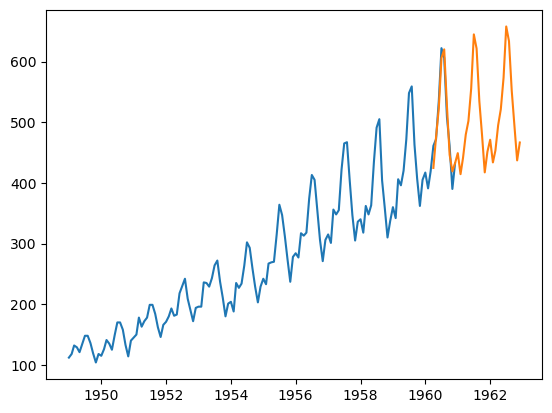

In [34]:
plt.plot(df)
plt.plot(yp)